# The US GDP and the yield curves

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime

import pandas_datareader

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

I import data through the pandas_datareader FRED API.

Initially, I define the time period, which is from January 1982 to March 2023.

Second, I import data for the US GDP, the yield curves and the National Bureau of Economic Research (NBER) recession indicator. The recession indicator is essentially a dummy variable which takes the value 1 one when the US economy is in a recession and 0 otherwise. 

In [2]:
# Set time spand
start = datetime.datetime(1982,1,1)
end = datetime.datetime(2023,3,1)

# Import GDP
gdp = pandas_datareader.data.DataReader("GDP", 'fred', start, end)

# Import Yield curves via FRED API
yield_curves = pandas_datareader.data.DataReader(['T10Y3MM', 'T10Y2YM','T10YFFM'], 'fred', start, end)
yield_curves = yield_curves.rename(columns={'T10Y3MM': '10Y-3M', 'T10Y2YM': '10Y-2Y', 'T10YFFM': '10Y-FFR'})

# Import recession indicator
nber = pandas_datareader.data.DataReader('USREC', 'fred', start, end)

## Explore the data

To start with, I plot the US GDP and the GDP growth rate. Further, a shaded area is added to the plot, that shows when the US economy is in a recession.

To do this I begin with initiating a subplot, then I add a plot of the GDP in absolute values. Next, I use the function .pct_change() to calculate the GDP growth rate and plot it after. Then I add the recession shades to both plots.

In Figure 1 (a) it appears that the GDP is following a growing trend during the examined time period. Worth to notice is the rapid downturn and V shaped recovery in the economy following the COVID-19 pandemic around 2020.

In (b) the GDP growth rate is depicted. It is clear that the growth rate typically is positive doing the investigated period. There are however some noticeable periods with negative growth rates. The Great Recession around 2007 - 2009 is the period where the growth rate is negative for the longest period. During the COVID crisis the most negative observation is found with a growth rate of nearly -9%. 

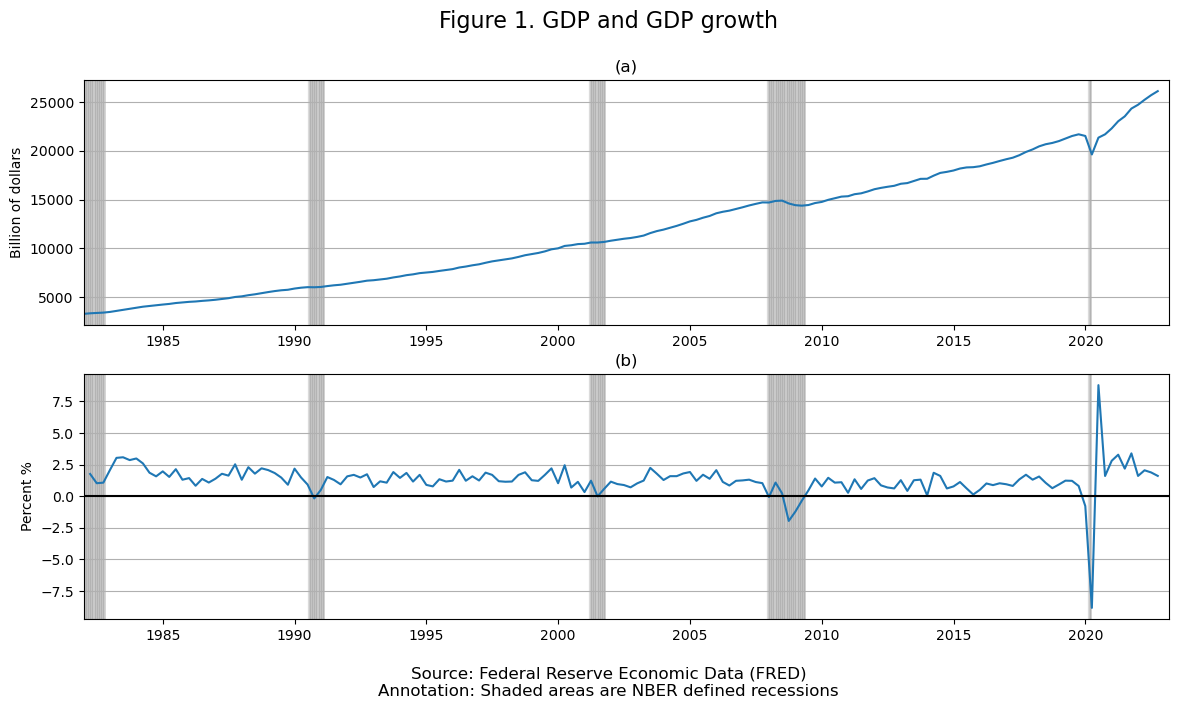

In [14]:
# Plot of Figure 1
fig, (fig1, fig1_2) = plt.subplots(2, figsize=(14,7))

# Plot GDP in absolute values
fig1.plot(gdp, label='GDP')
fig1.set_xlim(start, end)
fig1.grid(axis='y')
fig1.set_ylabel('Billion of dollars')
fig1.set_title('(a)')

# Plot GDP growth rate
gdp_g = gdp.pct_change()*100
                       
fig1_2.plot(gdp_g, label='GDP growth')
fig1_2.set_xlim(start, end)
fig1_2.grid(axis='y')
fig1_2.set_ylabel('Percent %')
fig1_2.axhline(y=0, color='black')
fig1_2.set_title('(b)')


# Recession shade
for i in range(len(nber)):
    if nber['USREC'].iloc[i] == 1:
        fig1.axvspan(nber.index[i-1], nber.index[i], alpha=0.2, color='gray')
        fig1_2.axvspan(nber.index[i-1], nber.index[i], alpha=0.2, color='gray')
    if nber['USREC'].iloc[i] == 0:
        fig1.axvspan(nber.index[i-1], nber.index[i], alpha=1, color='white')
        fig1_2.axvspan(nber.index[i-1], nber.index[i], alpha=1, color='white')

# Set title and textbox for annotation
fig.suptitle('Figure 1. GDP and GDP growth', fontsize="16")
fig.text(0.5, 0, 'Source: Federal Reserve Economic Data (FRED)\nAnnotation: Shaded areas are NBER defined recessions', transform=fig.transFigure, fontsize=12, horizontalalignment='center')

# Show plot
plt.show()


As Figure 1 showed, the US economy does fluctuate at times. It is in the Federal Reserve's (FED) and government's interest to try to smoothen such fluctuations. This can among other reasons be to avoid unnecessary welfare loss. To achieve this, it can be an idea to pay attention to the yield curve.

In Figure 2 the 10-year less 3-month, 10-year less 2-year and 10-year less federal funds rate are depicted. It is seen that all three yield curves has been inverted before the last four recessions, except in the latest one, where the 10-year less 2-year spread did not invert (the other twos did). This emphasizes why following the yield curves closely can be useful.

The three yield curves does seem to fluctuate quite a bit. Worth to note is that the 10Y-2Y one looks a bit less volatile compared to the others.

To create Figure 2 I begin with creating a plot, which I then add the three yield curves to. Further, I label each of them for making it easier to distinguish between them in the figure. Next, I set the title, add labels, add legends and a text box for the annotation and data source. There is also added grid lines for the y-axis and where y = 0 is also highlighted extra. The recession shade is also added to the figure.

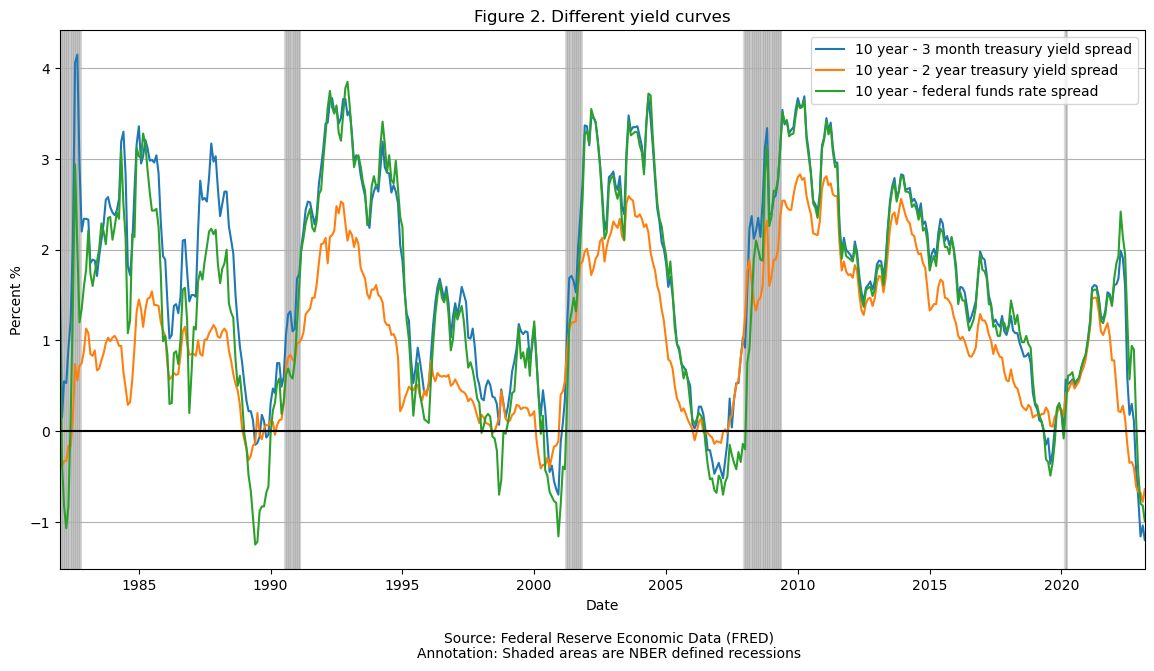

In [4]:
# Plot of Figure 2
fig, fig2 = plt.subplots(figsize=(14,7))

fig2.plot(yield_curves['10Y-3M'], label='10 year - 3 month treasury yield spread')
fig2.plot(yield_curves['10Y-2Y'], label='10 year - 2 year treasury yield spread')
fig2.plot(yield_curves['10Y-FFR'], label='10 year - federal funds rate spread')

# Set title, labebls, legends and textbox
fig2.set_title('Figure 2. Different yield curves')
fig2.set_xlabel('Date')
fig2.set_ylabel('Percent %')
fig2.set_xlim(start, end)
fig2.legend()
fig2.text(12000, -2.5,'Source: Federal Reserve Economic Data (FRED)\nAnnotation: Shaded areas are NBER defined recessions',ha='center')

# Gridlines
fig2.grid(axis='y')
fig2.axhline(y=0, color='black')

# Recession shade
for i in range(len(nber)):
    if nber['USREC'].iloc[i] == 1:
        fig2.axvspan(nber.index[i-1], nber.index[i], alpha=0.2, color='gray')
    if nber['USREC'].iloc[i] == 0:
        fig2.axvspan(nber.index[i-1], nber.index[i], alpha=1, color='white')
# Show plot
plt.show()

# Merge data sets

Now, i merge the two data sets yield_curves and nber.

In [5]:
# Merge of the two datasets
merge = pd.merge(yield_curves, nber, how='left',on=['DATE'])
merge.head(10)

,10Y-3M,10Y-2Y,10Y-FFR,USREC
DATE,,,,
1982-01-01,1.67,0.02,1.37,1
1982-02-01,0.15,-0.39,-0.35,1
1982-03-01,0.55,-0.33,-0.82,1
1982-04-01,0.53,-0.33,-1.07,1
1982-05-01,0.91,-0.16,-0.83,1
1982-06-01,1.22,-0.17,0.15,1
1982-07-01,2.09,0.15,1.36,1
1982-08-01,4.06,0.74,2.94,1
1982-09-01,4.15,0.56,2.03,1


A left join is here applied so I keep all observations in yield_curves intact and subset from nber.

I then conduct another left join merge, now with the GDP with the GDP growth.

In [8]:
merge2 = pd.merge(gdp, gdp_g, how='left', on=['DATE'])
merge2 = merge2.rename(columns={'GDP_x': 'GDP', 'GDP_y': 'GDP_growth'})

merge2.head(10)

,GDP,GDP_growth
DATE,,
1982-01-01,3274.302,NaN
1982-04-01,3331.972,1.761291
1982-07-01,3366.322,1.030921
1982-10-01,3402.561,1.076516
1983-01-01,3473.413,2.082314
1983-04-01,3578.848,3.035487
1983-07-01,3689.179,3.082864
1983-10-01,3794.706,2.860447
1984-01-01,3908.054,2.987003


# Analysis

To get a quick overview of the data, I show some **summary statistics** of the yield curves along with the NBER based recession indicator.

It is seen that we have 495 observations for the four variables. The data is in this instance monthly. For the yield curves, the 10Y-2Y one has the lowest mean 1.02% and the 10Y-3M has the highest, approx 1.70%. From the standard deviation and variance, it is found that the 10Y-FFR seem to be the most volatile of the three with a variance of 1.46. The least volatile is the 10Y-2Y, which Figure 2 also suggested.

The USREC is the dummy variable for NBER defined recessions and can only have the value 0 or 1. 

In [6]:
# Summary statistics
sum = merge.describe().transpose()[['count', 'mean', 'std', 'min', 'max']]
# Calculate and add variance 
sum['var'] = merge.var()
sum

,count,mean,std,min,max,var
10Y-3M,495.0,1.697455,1.125525,-1.20,4.15,1.266807
10Y-2Y,495.0,1.022061,0.839326,-0.78,2.83,0.704469
10Y-FFR,495.0,1.496889,1.210909,-1.25,3.85,1.466300
USREC,495.0,0.094949,0.293442,0.00,1.00,0.086108


I also perform summary statistics for the GDP and GDP growth.

First, it should be mentioned that the observation count is not the same. This is because GDP_growth misses the first observation due to the nature of the calculation. There are also fewer observations compared to the other dataset. This is due to the GDP dataset is in quarterly data instead of monthly, as monthly data for GDP was not available.

It is observed that the mean growth rate for the period is 1.29% with a minimum of -8.83 % following the COVID crisis and a maximum of 8.79% seen during the recovery from COVID.

In [16]:
# Summary statistics of GDP growth
sum_gdp = merge2.describe().transpose()[['count', 'mean', 'std', 'min', 'max']]
sum_gdp

,count,mean,std,min,max
GDP,164.0,11875.097476,6042.171715,3274.302000,26137.992000
GDP_growth,163.0,1.290225,1.237453,-8.827645,8.788107


# Conclusion

It has been found that the US GDP follows an upward trend, but does fluctuate at times. It can therefore be wise to try to smooth out these fluctuations. Thus, it can be worth watching the development of the yield curves. The last four recessions have been preceded by an inverted yield curve. 